In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.stattools import durbin_watson
import numpy as np

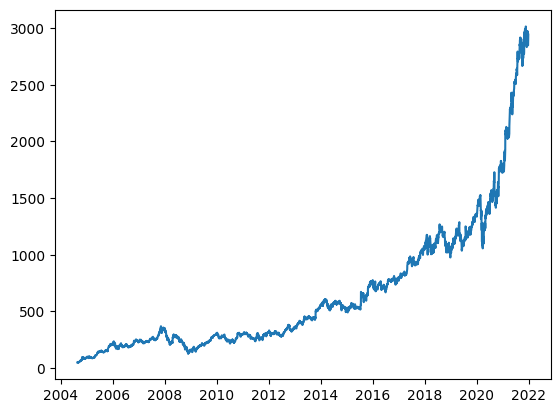

In [ ]:
url="/content/google.csv"

df=pd.read_csv(url,parse_dates=['Date'])
df.set_index('Date',inplace=True)
plt.plot(df['Close'])

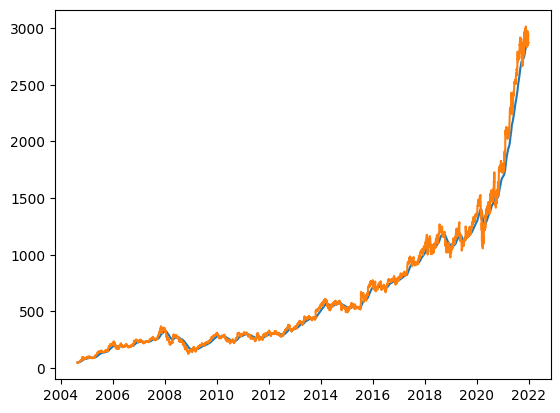

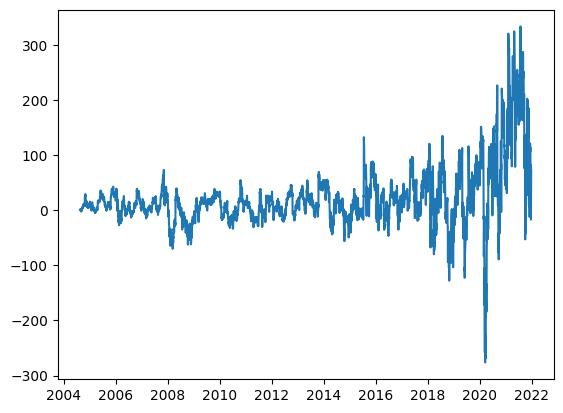

Durbin-Watson statistic: 0.054911544136541424


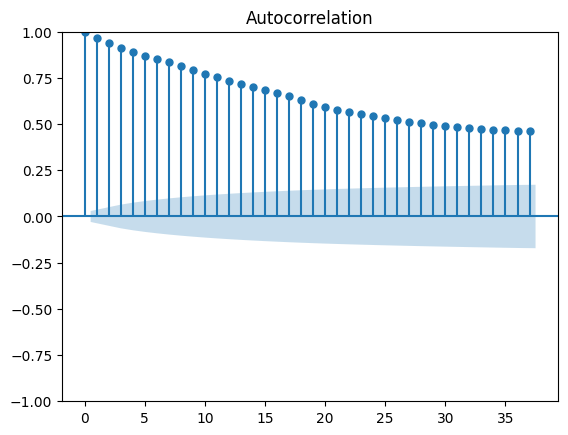

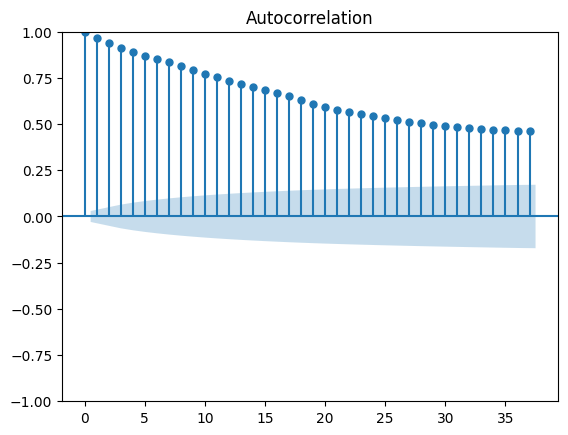

In [ ]:
df['diff']=df['Close'].diff()
#plt.plot(df['diff'])

df['EMA']=df['Close'].ewm(35).mean()


plt.plot(df['EMA'])
plt.plot(df['Close'])

df['detrend']=df['Close']-df['EMA']


plt.show()

plt.plot(df['detrend'])
plt.show()

dw_stat = durbin_watson(df['detrend'].dropna())

print(f'Durbin-Watson statistic: {dw_stat}')

plot_acf(df['detrend'])

,Open,High,Low,Close,Adj Close,Volume,diff,diff_MA,MA,detrend,EMA
Date,,,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,NaN,NaN,49.982655,0.000000,49.982655
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,3.970115,3.970115,51.995671,1.957099,51.995671
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,0.542965,2.239574,52.852609,1.643126,52.852609
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,-2.256538,0.711096,52.692716,-0.453519,52.692716
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,0.562889,0.672936,52.715840,0.086246,52.715840
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,2854.290039,2889.201904,2835.760010,2856.060059,2856.060059,2162800,-40.709961,0.872729,2865.533071,-9.473012,2865.533071
2021-12-20,2813.592041,2852.209961,2805.000000,2848.030029,2848.030029,1013200,-8.030030,0.698165,2865.046875,-17.016846,2865.046875
2021-12-21,2863.000000,2893.841064,2834.699951,2884.409912,2884.409912,977400,36.379883,1.397807,2865.584737,18.825175,2865.584737


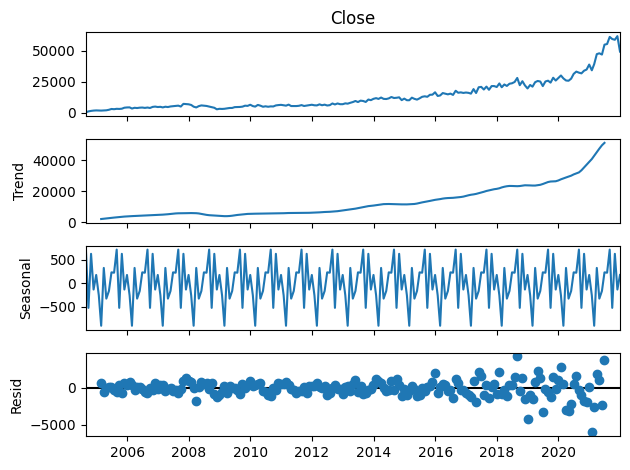

Durbin-Watson statistic: 1.6087757158863938


In [ ]:
monthly_data=df['Close'].resample('M').sum()
decomp=seasonal_decompose(monthly_data)

decomp.plot()
plt.show()

res=decomp.resid
dw_stat = durbin_watson(res.dropna())

print(f'Durbin-Watson statistic: {dw_stat}')



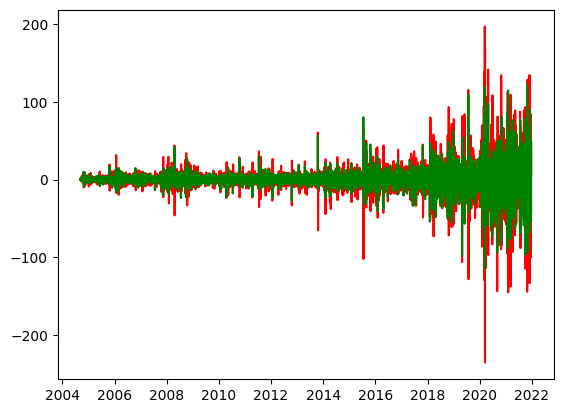

In [ ]:
df['ma'] = df['Close'].rolling(window=12).mean()  # Smoothing with Moving Average
df['detrended'] = df['Close'] - df['ma']  # Subtracting MA from original series
df['residuals'] = df['detrended'].diff()  # Differencing the detrended data

df['res']=df['residuals'].diff()


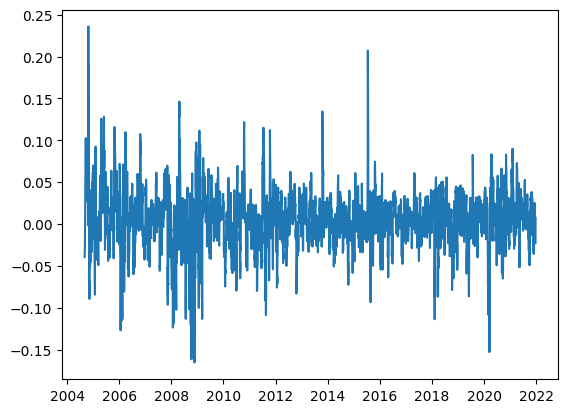

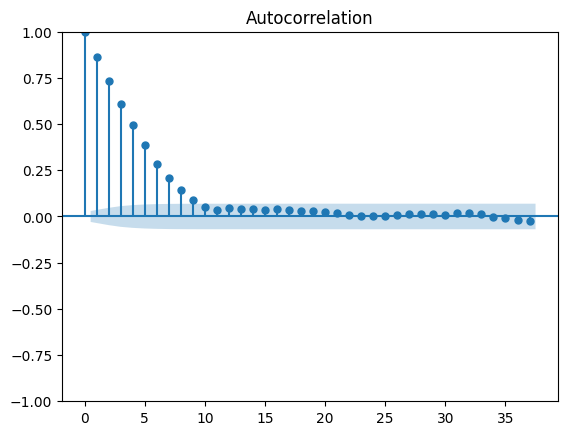

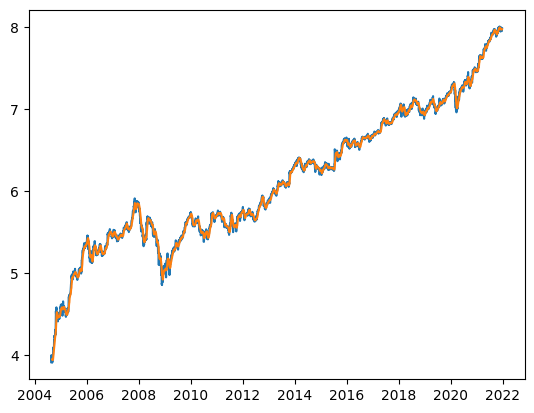

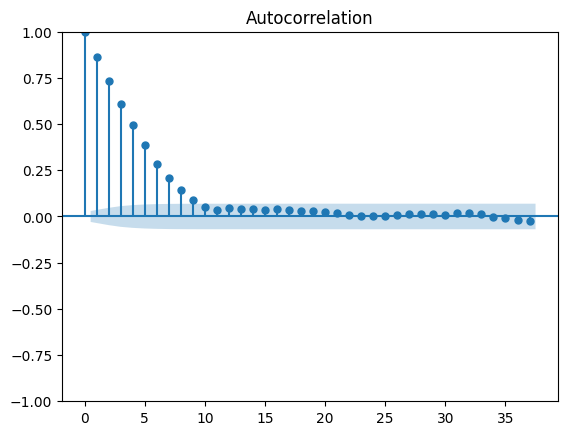

In [ ]:
df['log']=np.log(df['Close'])

df['malog']=df['log'].rolling(window=12).mean()

df['detrended']=df['log']-df['malog']

plt.plot(df['detrended'])
plt.show()

plt.plot(df['log'])
plt.plot(df['malog'])

plot_acf(df['detrended'].dropna())

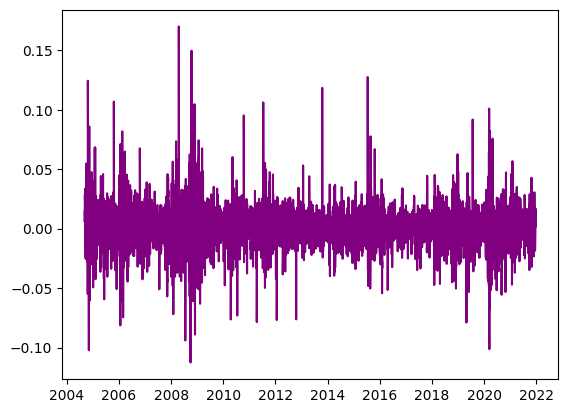

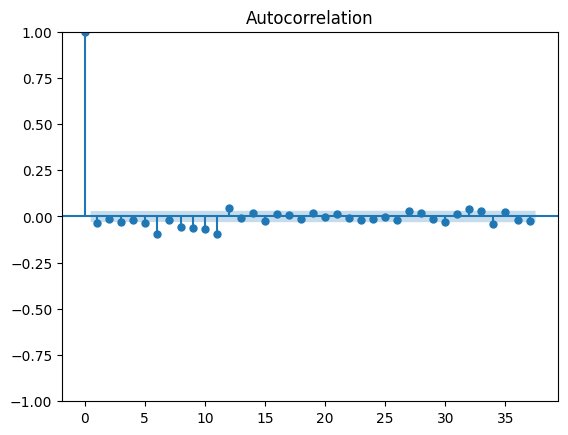

In [ ]:
df['diff_detrended'] = df['detrended'].diff()

plt.plot(df['diff_detrended'],color='purple')
plot_acf(df['diff_detrended'].dropna())
plt.show()
